# Load all imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import helper
import net

# Globals, CNNs, and Device

In [17]:
PATH = 'C:/Users/Ryan/Desktop/machine-learning/part2/cnn'

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
learningRates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
numEpochs = 10

adamNets = helper.createNets(len(learningRates), 'sig')
sgdNets = helper.createNets(len(learningRates), 'sig')
print(sum([p.numel() for p in adamNets[0].parameters()]))
print(sum([p.numel() for p in sgdNets[0].parameters()]))


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

for i in range(len(learningRates)):
    adamNets[i] = adamNets[i].to(device)
    sgdNets[i] = sgdNets[i].to(device)

884330
884330
cuda:0


# MNIST training and validation set augmentation

In [3]:
valid_ratio = 0.3

transform = transforms.Compose([
    # define your data augmentation here!
    # transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_valid_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset))
nb_valid =  int(valid_ratio * len(train_valid_dataset))
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True, num_workers=2, pin_memory=True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=1000, shuffle=True, num_workers=2, pin_memory=True)

# Define the loss function and the optimizer.

In [4]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

# define your optimizer and its learning rate (lr) here!
adams, sgds = helper.createOptimizers(adamNets, sgdNets, learningRates)

# Train the CNN and store the best model based on the validation loss.

In [5]:
import os as OO
OO.mkdir(PATH + '/task1')
PATH = PATH + '/task1'

adamTrainingLoss = []
adamValidationLoss = []
sgdTrainingLoss = []
sgdValidationLoss = []

for i in range(len(learningRates)):
    train, val = helper.runCNN(trainloader, device, adams[i], adamNets[i], criterion, validloader, PATH, 'adam', numEpochs)
    adamTrainingLoss.append(train)
    adamValidationLoss.append(val)

for i in range(len(learningRates)):
    train, val = helper.runCNN(trainloader, device, sgds[i], sgdNets[i], criterion, validloader, PATH, 'sgd', numEpochs)
    sgdTrainingLoss.append(train)
    sgdValidationLoss.append(val)

np.save(OO.path.join(PATH, 'adamTrainingLoss.npy'), adamTrainingLoss)
np.save(OO.path.join(PATH, 'adamValidationLoss.npy'), adamValidationLoss)
np.save(OO.path.join(PATH, 'sgdTrainingLoss.npy'), sgdTrainingLoss)
np.save(OO.path.join(PATH, 'sgdValidationLoss.npy'), sgdValidationLoss)

# Define the test dataset.

In [6]:
transform = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))
])
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Infer on the whole test dataset.

In [18]:
testloader = torch.utils.data.DataLoader(testset, batch_size=200, shuffle=False, num_workers=2, pin_memory=True)

testNet = net.SigNet()
testNet = testNet.to(device)
import os as OO

adamAccuracy = []
sgdAccuracy = []

def printAccuracies(accuracy, testNet, kind, optimizers):
    for i in range(len(learningRates)):    
        temp = []
        newPath = PATH + "/{}_lr_{}".format(fileName, optimizers[i].defaults['lr'])
        for j in range(numEpochs):
            fileName = "{}_epoch_{}_lr_{}.pth".format(kind, j, learningRates[i])
            testNet.load_state_dict(torch.load(OO.path.join(newPath, fileName)))
            correct, total = helper.testCNN(testloader, testNet, device)
            temp.append(100 * correct / total)
        accuracy.append(temp)


testNet = net.SigNet()
testNet = testNet.to(device)
printAccuracies(adamAccuracy, testNet, 'adam')

testNet = net.ReluNet()
testNet = testNet.to(device)
printAccuracies(sgdAccuracy, testNet, 'sgd')

aTrain = np.load(OO.path.join(PATH, 'adamTrainingLoss.npy'))
aVal = np.load(OO.path.join(PATH, 'adamValidationLoss.npy'))
sTrain = np.load(OO.path.join(PATH, 'sgdTrainingLoss.npy'))
sVal = np.load(OO.path.join(PATH, 'sgdValidationLoss.npy'))

adam_epoch_0_lr_1e-05.pth accuracy: 10.320 %
adam_epoch_1_lr_1e-05.pth accuracy: 10.100 %
adam_epoch_2_lr_1e-05.pth accuracy: 10.100 %
adam_epoch_3_lr_1e-05.pth accuracy: 10.100 %
adam_epoch_4_lr_1e-05.pth accuracy: 11.350 %
adam_epoch_5_lr_1e-05.pth accuracy: 11.350 %
adam_epoch_6_lr_1e-05.pth accuracy: 11.350 %
adam_epoch_7_lr_1e-05.pth accuracy: 11.350 %
adam_epoch_8_lr_1e-05.pth accuracy: 11.350 %
adam_epoch_9_lr_1e-05.pth accuracy: 11.350 %
adam_epoch_0_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_1_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_2_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_3_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_4_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_5_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_6_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_7_lr_0.0001.pth accuracy: 11.350 %
adam_epoch_8_lr_0.0001.pth accuracy: 12.780 %
adam_epoch_9_lr_0.0001.pth accuracy: 25.810 %
adam_epoch_0_lr_0.001.pth accuracy: 11.350 %
adam_epoch_1_lr_0.001.pth accuracy: 21.460 %


# Graph Training Losses and Accuracy

Text(0, 0.5, 'Training Loss')

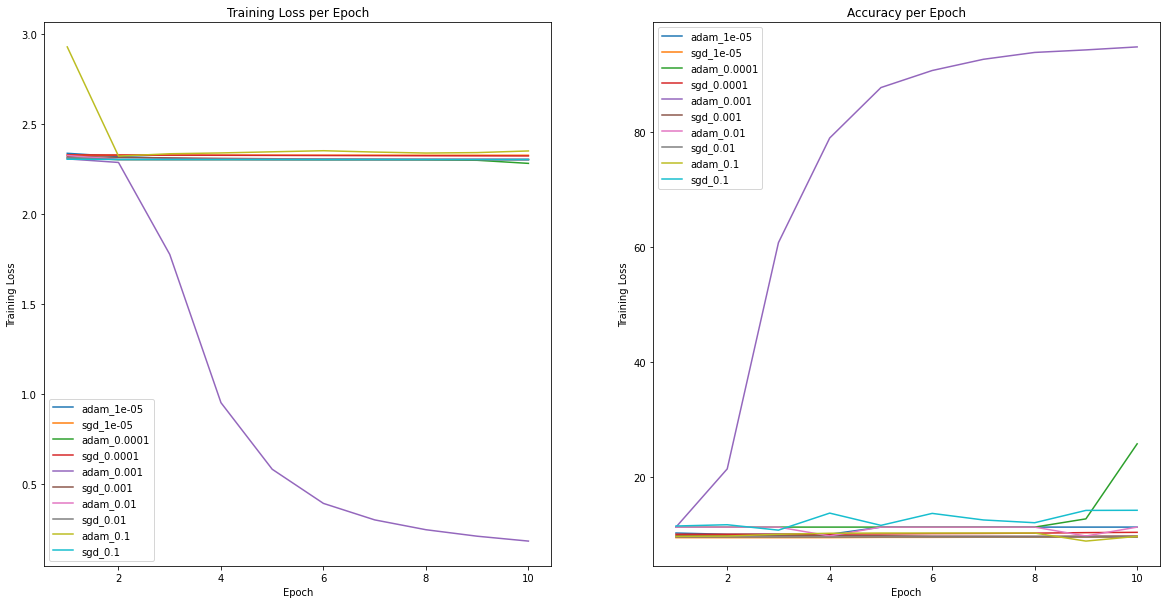

In [19]:
import numpy as np
import matplotlib.pyplot as plt

epochs = range(1, 11)
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

for i in range(len(learningRates)):
    ax[0].plot(epochs, aTrain[i], label='adam_{}'.format(learningRates[i]))
    ax[0].plot(epochs, sTrain[i], label='sgd_{}'.format(learningRates[i]))

for i in range(len(learningRates)):
    ax[1].plot(epochs, adamAccuracy[i], label='adam_{}'.format(learningRates[i]))
    ax[1].plot(epochs, sgdAccuracy[i], label='sgd_{}'.format(learningRates[i]))

ax[0].legend(loc="lower left")
ax[1].legend(loc="upper left")

ax[0].set_title("Training Loss per Epoch")
ax[1].set_title("Accuracy per Epoch")

ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Training Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Training Loss")